In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def myMAD(x):
    med = np.median(x)
    x   = abs(x-med)
    MAD = np.median(x)
    return MAD

In [3]:
df1 = pd.read_csv('Android/results/performances_nexus5.csv')
df1['smartphone'] = 'nexus5'
df2 = pd.read_csv('Android/results/performances_nexus6.csv')
df2['smartphone'] = 'nexus6'
df3 = pd.read_csv('Android/results/performances_s9.csv')
df3['smartphone'] = 'S9 plus'
df4 = pd.read_csv('Android/results/performances_xiaomi.csv')
df4['smartphone'] = 'Mi9T'

df = pd.concat([df1, df2, df3, df4])
df.pop('warmup');

In [4]:
medians = df.groupby([df.smartphone, df.model]).median().unstack()
errors = df.groupby([df.smartphone, df.model]).apply(myMAD).unstack()

In [5]:
medians = medians.reindex(columns=['neumf', 'ecam neumf', 'mobile'], level='model')
#errors = errors.reindex(columns=['neumf', 'ecam neumf', 'mobile'], level='model')

In [6]:
def plot_median(type):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()

    plot = medians[type].plot(kind= 'bar',
                         color=['#F3DE8A', '#EB9486','#43BCCD'],
                         rot=0,  # don't rotate model names
                         ylabel='time (μs)',
                         #yerr=errors[type], # errors bar
                         capsize=6, # error cap size
                         width=0.7,
                         ax=ax)

    ax.grid(axis = 'y', linestyle = '--', linewidth = 1)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['NeuMF', 'Ecam NeuMF', 'moveCARS']) # rename legend
    plt.savefig('inference_tflite.pdf', format='pdf', bbox_inches='tight')
    plt.show()

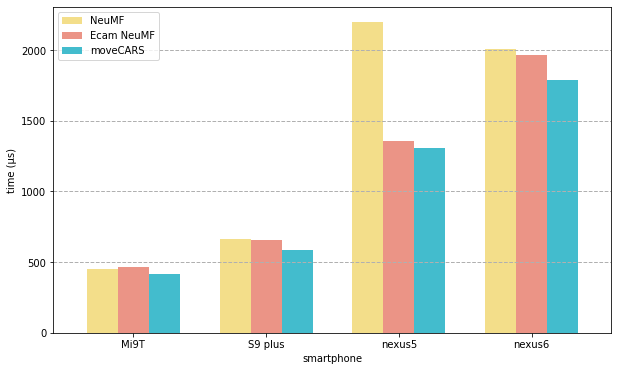

In [7]:
plot_median('init')

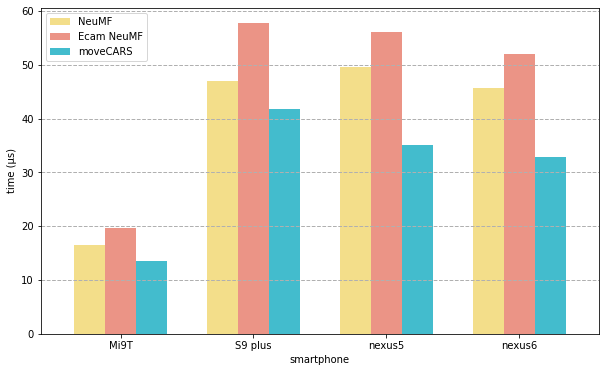

In [47]:
plot_median('inference')